In [95]:
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.style as mplstyle

import seaborn as sns

import glob


In [96]:
plt.style.use('default')
sns.set_theme(context='paper', style='white', palette='viridis', font='serif',
            font_scale=2, color_codes=True, rc={'text.usetex' : True})
mplstyle.use('fast')

In [97]:
DATA_PATH = "../output/"

DATA_DIR = "Hetero_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10"
# DATA_DIR = "Homo_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10"


In [98]:
run_dirs = glob.glob(DATA_PATH+ DATA_DIR + "/run_[0-8]")

In [99]:
run_dirs

['../output/Hetero_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10/run_6',
 '../output/Hetero_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10/run_5',
 '../output/Hetero_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10/run_8',
 '../output/Hetero_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10/run_3',
 '../output/Hetero_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10/run_0',
 '../output/Hetero_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10/run_1',
 '../output/Hetero_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10/run_4',
 '../output/Hetero_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10/run_2',
 '../output/Hetero_poly_test_linear_grad_strat__no_bias_5_5_25000_100_0.0001_runs_10/run_7']

In [100]:
neuron_history = [np.loadtxt(run_dir + "/neurons.txt") for run_dir in run_dirs]

In [101]:
first_removal_history = []
for neurons in neuron_history:
    diff = np.diff(neurons)
    try:
        index = np.where(diff < 0)[0][0] + 1
    except IndexError:
        index = np.nan
    first_removal_history.append(index)


In [102]:
non_removal_density = np.isnan(first_removal_history).sum()/len(first_removal_history)

In [103]:
non_removal_density

0.0

Text(0.5, 1.0, 'first neuron removal epoch')

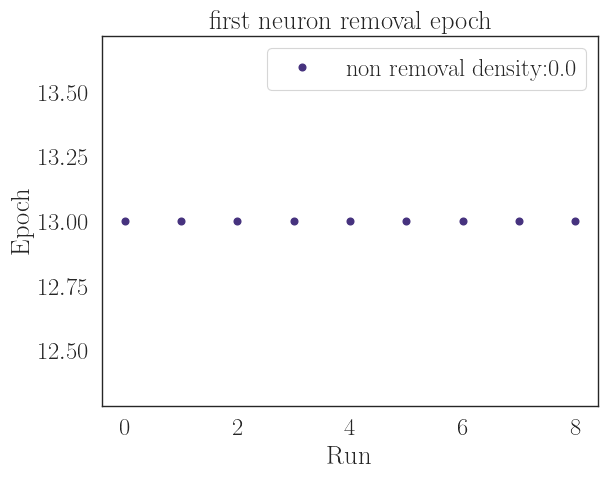

In [104]:
plt.plot(first_removal_history, "o", label=f"non removal density:{non_removal_density}")
plt.ylabel("Epoch")
plt.xlabel("Run")
plt.legend()
plt.title("first neuron removal epoch")


In [105]:
removal_history = np.loadtxt(DATA_PATH + DATA_DIR + "/first_removal_history.txt")

In [106]:
epoch, n_neurons, train_loss, test_loss =  removal_history.T

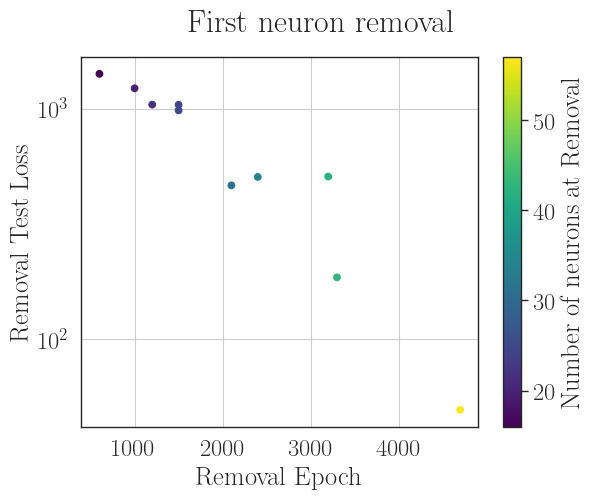

In [107]:
# fig = plt.figure(figsize=(10, 10))
plt.scatter(epoch, test_loss, c=n_neurons, cmap='viridis')
plt.xlabel('Removal Epoch')
plt.ylabel('Removal Test Loss')
plt.colorbar(label='Number of neurons at Removal')
plt.yscale('log')
plt.grid()
plt.suptitle('First neuron removal')
plt.show()

In [108]:
from scipy import stats 

first_removal_mode = stats.mode(first_removal_history, nan_policy= "omit")

In [109]:
first_removal_mode

ModeResult(mode=13, count=9)

In [110]:
train_loss_history = [np.loadtxt(run_dir + "/train_loss.txt") for run_dir in run_dirs]
test_loss_history = [np.loadtxt(run_dir + "/test_loss.txt") for run_dir in run_dirs]

In [111]:
y_pred_history = [np.loadtxt(run_dir + "/y_pred.txt") for run_dir in run_dirs]
y_pred_mean = np.mean(y_pred_history, axis = 0)
y_pred_std = np.std(y_pred_history, axis = 0)

In [112]:
def poly(x):
    return (x - 3)*(x - 2)*(x - 1)*x*(x + 1)*(x + 2)*(x + 3)

x = np.linspace(-3, 3, 20000).reshape(-1, 1)
y = poly(x)

_, x, _, y = train_test_split(x, y, test_size=0.2, random_state=0)

In [113]:
x = x.flatten()
y = y.flatten()
y_pred_mean = y_pred_mean.flatten()
y_pred_std = y_pred_std.flatten()

sort_indices = np.argsort(x)

# Use these indices to sort x, y, y_pred_mean, and y_pred_std
x = x[sort_indices]
y = y[sort_indices]
y_pred_mean = y_pred_mean[sort_indices]
y_pred_std = y_pred_std[sort_indices]


In [114]:
x.shape, y.shape

((4000,), (4000,))

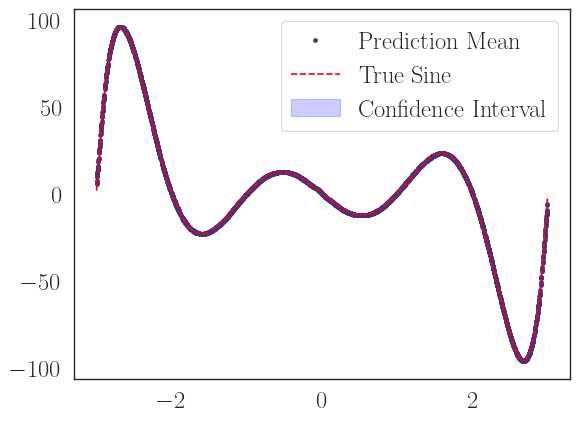

In [115]:
plt.plot(x, y_pred_mean, ".", label='Prediction Mean')
plt.plot(x, y, 'r--' ,label='True Sine')
plt.fill_between(x, y_pred_mean - y_pred_std, y_pred_mean + y_pred_std, color='blue', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.show()

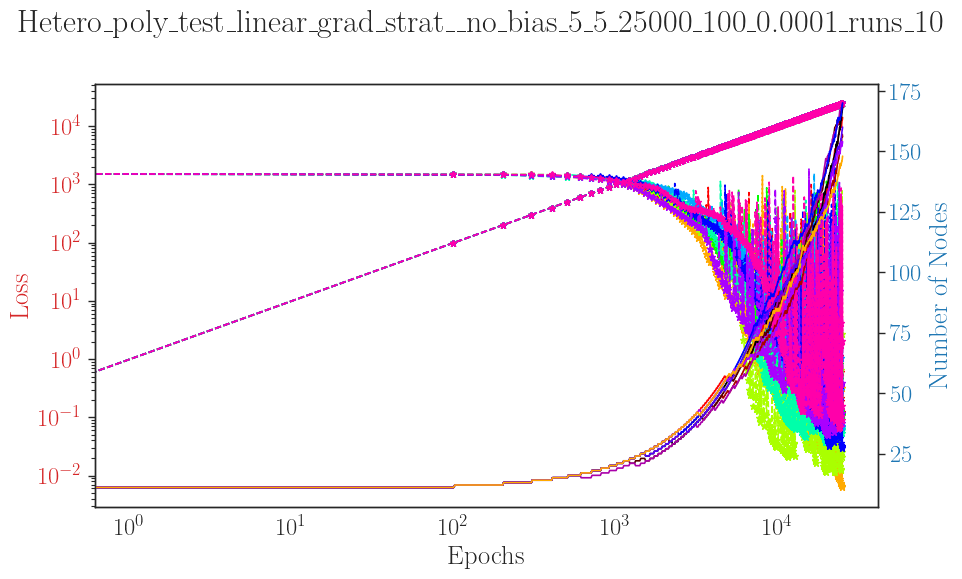

In [116]:
fig, ax1 = plt.subplots(figsize=(10, 6))

loss_color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=loss_color)
ax1.tick_params(axis='y', labelcolor=loss_color)
ax1.set_yscale("log")
ax1.set_xscale("log")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

neuron_color = 'tab:blue'
ax2.set_ylabel('Number of Nodes', color=neuron_color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=neuron_color)

hue = 0
saturation = 1.0
value = 1.0

for train_losses, test_losses, neurons in zip(train_loss_history, test_loss_history, neuron_history):
    test_epoch, test_loss = test_losses.T
    train_epoch, train_loss = train_losses.T
    neuron_epoch, neurons = neurons.T

    # Convert the hue, saturation, and value to RGB
    loss_color = colors.hsv_to_rgb((hue, saturation, value))
    neuron_color = colors.hsv_to_rgb((360-hue, saturation, value))

    ax1.plot(train_epoch, train_losses, "--", color=loss_color)
    ax1.plot(test_epoch, test_losses, "*", color=loss_color)
    ax2.plot(neuron_epoch, neurons, "-", color=neuron_color)

    # Update the hue for the next iteration
    hue = (hue + 1.0 / len(train_loss_history)) % 1.0


plt.suptitle(DATA_DIR)
fig.tight_layout()

In [117]:
final_shape = [np.loadtxt(run_dir + "/final_shape.txt") for run_dir in run_dirs]
final_adjacency_matrix = [np.loadtxt(run_dir + "/final_adjacency_matrix.txt") for run_dir in run_dirs]

In [118]:
adj = final_adjacency_matrix[0]
shape = final_shape[0].astype(int)

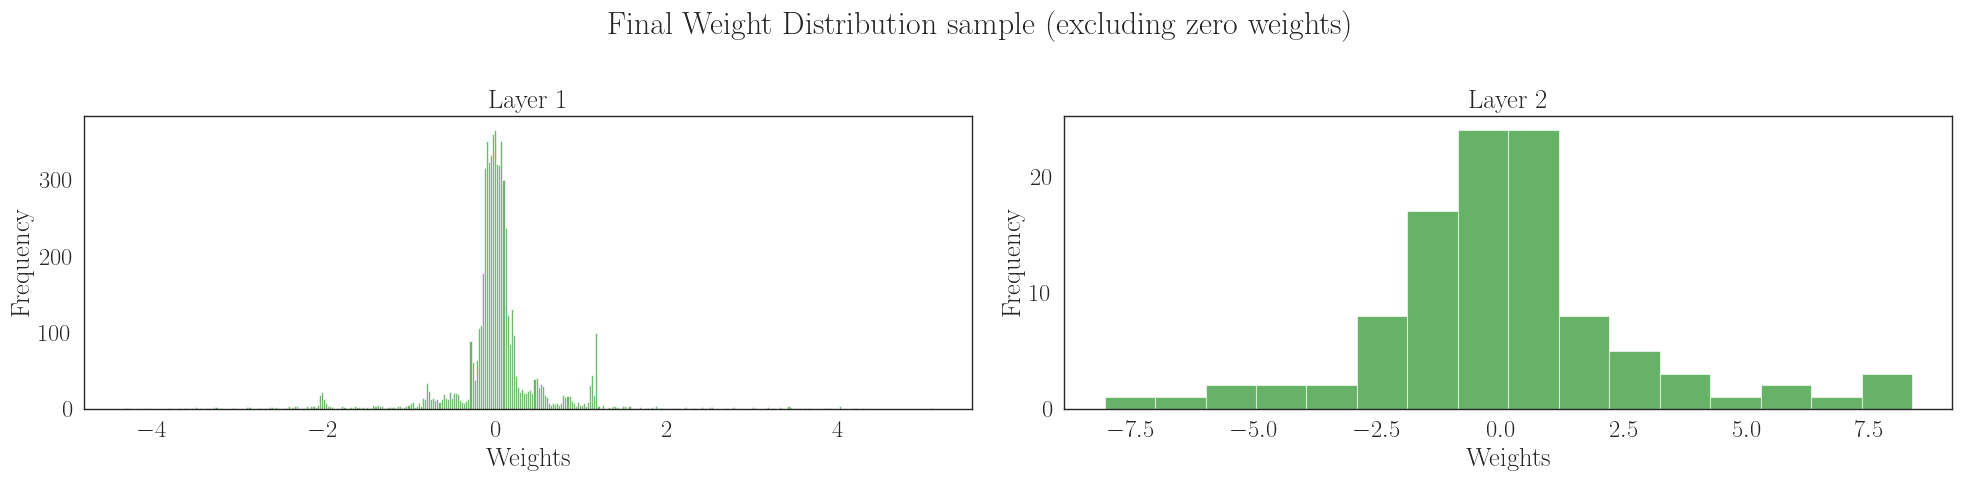

In [119]:
sub_matrices = np.split(adj, np.cumsum(shape)[:-1])[:-1]

fig, axs = plt.subplots(1, len(sub_matrices), figsize=(20, 5))

for i, (sub_matrix, ax) in enumerate(zip(sub_matrices, axs), start=1):
    weights = sub_matrix.flatten()
    weights = weights[weights != 0]
    ax.hist(weights, bins="auto", density=False, alpha=0.6, color='g')
    ax.set_xlabel('Weights')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Layer {i}')

# Display the figure with its subplots
plt.suptitle('Final Weight Distribution sample (excluding zero weights)')
plt.tight_layout()
plt.show()

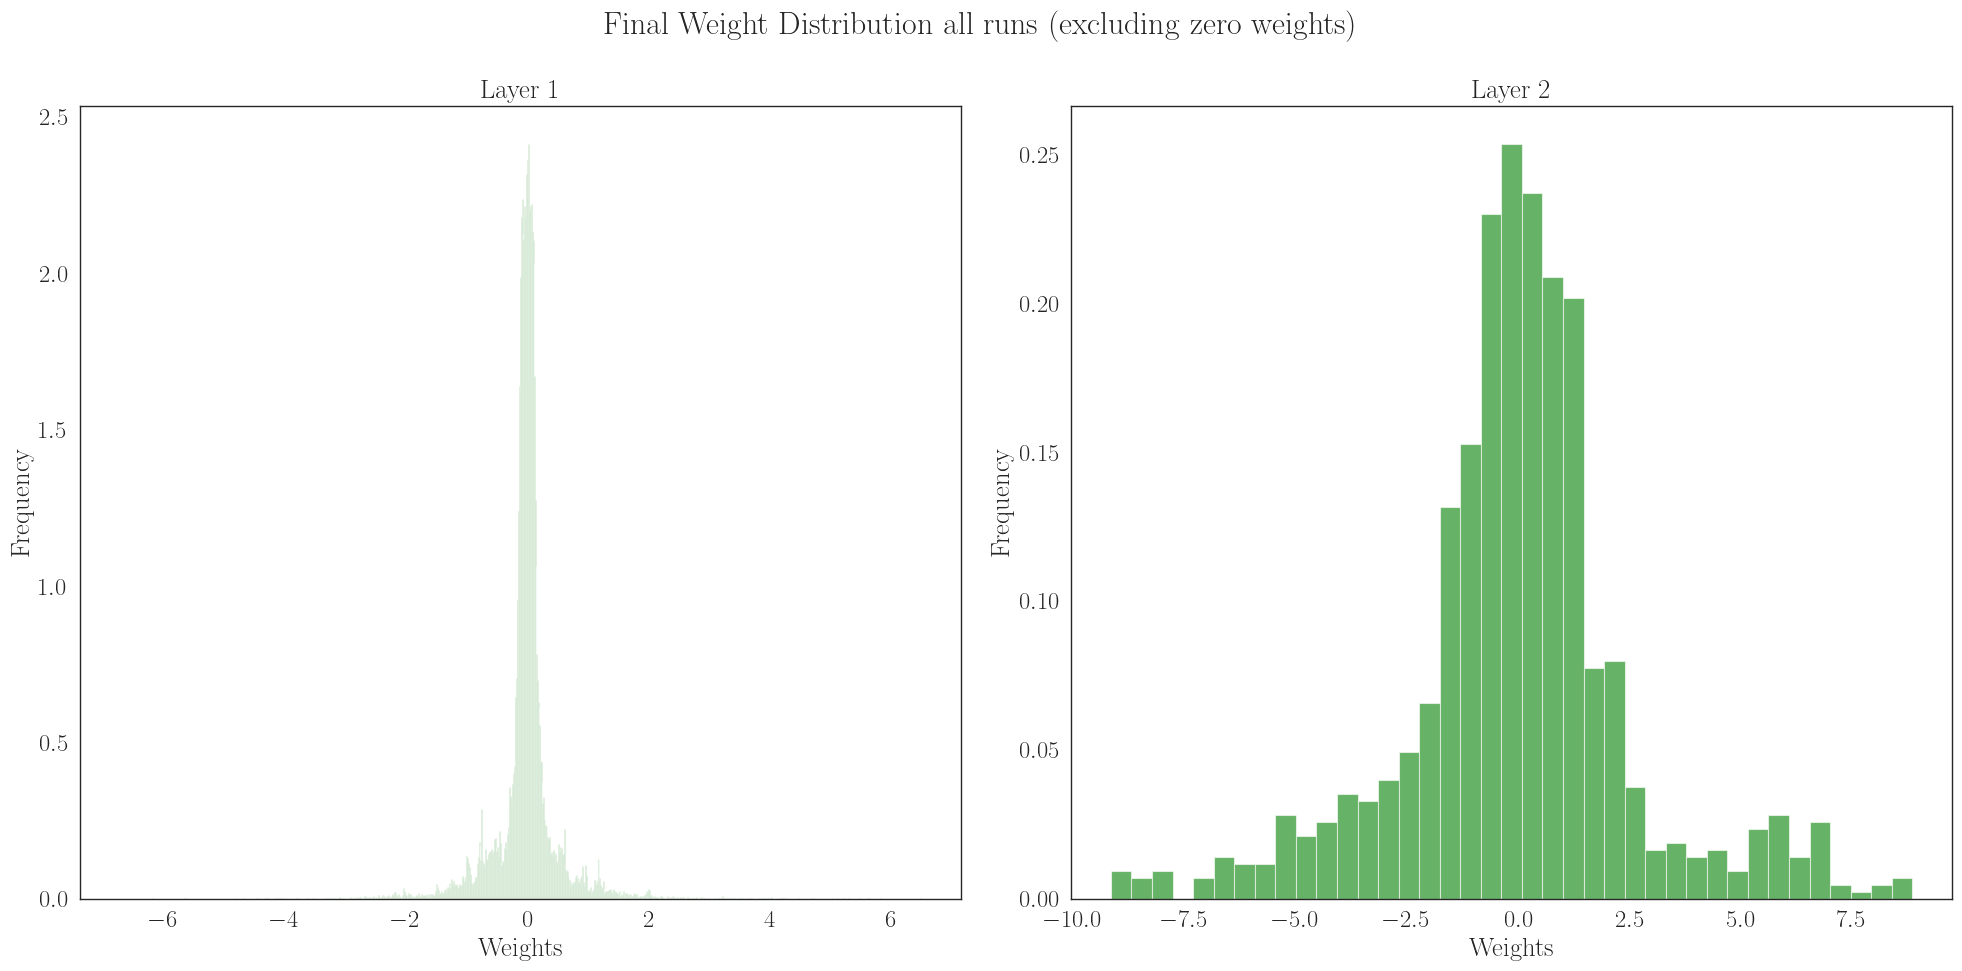

In [120]:
weights_by_layer = []

# For each adjacency matrix and its corresponding layer sizes
for adjacency_matrix, layer_sizes in zip(final_adjacency_matrix, final_shape):
    shape = layer_sizes.astype(int)
    # Split the adjacency matrix into sub-matrices
    sub_matrices = np.split(adjacency_matrix, np.cumsum(shape)[:-1])[:-1]

    # For each sub-matrix, add its flattened weights to the corresponding sublist in weights_by_layer
    for i, sub_matrix in enumerate(sub_matrices):
        # Flatten the sub-matrix and filter out the zeros
        weights = sub_matrix.flatten()
        weights = weights[weights != 0]

        if i >= len(weights_by_layer):
            # If the sublist does not exist yet, create it
            weights_by_layer.append(list(weights))
        else:
            # If the sublist already exists, append to it
            weights_by_layer[i].extend(weights)


# For each sublist in weights_by_layer, plot a histogram of the weights
fig, axs = plt.subplots(1, len(weights_by_layer), figsize=(20, 10))
for i, (weights, ax) in enumerate(zip(weights_by_layer, axs), start=1):
    ax.hist(weights, bins="auto", density=True, alpha=0.6, color='g')
    ax.set_xlabel('Weights')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Layer {i}')

# Display the figure with its subplots
plt.suptitle('Final Weight Distribution all runs (excluding zero weights)')
plt.tight_layout()
plt.show()

In [121]:
weights_by_layer

[[-0.5899913311004639,
  -0.6638131737709045,
  0.12021645903587341,
  0.1295435130596161,
  -0.5974315404891968,
  1.5122843980789185,
  0.049110423773527145,
  1.432967185974121,
  0.8169272541999817,
  0.9593477249145508,
  -0.3448368310928345,
  -0.323201984167099,
  -1.0698413848876953,
  -0.3001757562160492,
  -0.265239953994751,
  0.28035223484039307,
  -0.24640671908855438,
  0.4186568260192871,
  -1.3705646991729736,
  0.3400441110134125,
  -0.000680446857586503,
  -0.25102463364601135,
  -0.05043387413024902,
  -0.0714578628540039,
  0.1943778544664383,
  0.13356103003025055,
  -0.001959325047209859,
  0.16463689506053925,
  0.05966625362634659,
  0.05888735502958298,
  0.0007007872918620706,
  0.1395912617444992,
  -0.6278457641601562,
  -3.2686898708343506,
  -0.09451410174369812,
  0.14195699989795685,
  -0.15632276237010956,
  -0.02428974211215973,
  0.16621780395507812,
  0.08691184222698212,
  -0.7515026926994324,
  -0.14556001126766205,
  -0.048039913177490234,
  -0.04